# Forecasting Store Traffic

#### By Dexter Nguyen
#### Updated: April 4, 2021

## Outline
1. Importing libraries
2. Read dataset
3. Cleaning data
4. Exploratory Data Analysis
5. Convert to dummy variables and Correlation Matrix
6. Modeling and Evaluation

## Problem definition
A global company is investing in restaurant business in Japan. They just finished the first financial year (2016) and are doing performance review. One of the questions is how they should allocate their restaurants in Japan. This dataset will partly help solve this question when we can see the relationships between the number of restaurant visits and some groups of independent variables, such as:
- Holiday in Japan
- Type of restaurant: food, dining, coffee
- Weather information
We also can analyze the seasonality of the retailing demand.

The output of this analysis should be a model and a group of variables that are most important to the store visits.

### 1. Importing Libraries

In [290]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for visualization
import matplotlib.pyplot as plt # Library for 2D plots of arrays
from mpl_toolkits.mplot3d import Axes3D  # Library for 3D plotting
import matplotlib as mpl # Library for creating static, animated, and interactive visualizations
import seaborn as sns # Library based on matplotlib
import plotly.express as px # Contains functions that can create entire figures at once

# Check
print('Libraries imported.')

Libraries imported.


### 2. Read data set
So we have three datasets as below. As the raw data is very heavy and complicated, these three datasets were already pre-cleaned.
- Store visits data of 2016 (train_restaurant_visitors.csv)
- Holiday information in Japan (holidays_data.csv)
- Weather data in 2016 (new_weather_data2.csv)


In [2]:
# Find out your current working directory
import os
print(os.getcwd())

C:\Users\Thanh Tinh Nguyen\Google Drive\Data Science\VA FPT Test


In [57]:
# Read holiday data
holidaydata=pd.read_csv("holidays_data.csv", encoding= 'unicode_escape')
holidaydata.head()

,Date,Holiday_Name
0,1/1/2018,New Year's Day
1,2/12/2018,Carnival
2,2/13/2018,Carnival
3,3/30/2018,Good Friday
4,5/1/2018,International Workers' Day


In [58]:
# Read restaurant data
restaurantdata=pd.read_csv("train_restaurant_visitors.csv", encoding= 'unicode_escape')
restaurantdata.head()

,date,type,latitude,longitude,number_of_visitors
0,1/1/2016,Bar/Cocktail,34.386245,132.455018,10
1,1/1/2016,Bar/Cocktail,34.681261,135.509801,42
2,1/1/2016,Bar/Cocktail,34.766093,135.628100,6
3,1/1/2016,Bar/Cocktail,35.646572,139.653247,31
4,1/1/2016,Bar/Cocktail,35.659397,139.696440,4


In [59]:
# Read weather data
weatherdata=pd.read_csv("new_weather_data2.csv", encoding= 'unicode_escape')
weatherdata.head()

,weather_date,temp,avg_humidity,total_precip,rain_avg_year,total_snow_cm,snowfall,snowfall_avg_year,sun,sun_avg_year,avg_wind,wind_avg_year
0,1/13/2016,-7.1,NaN,NaN,NaN,31.0,14.0,NaN,NaN,NaN,NaN,NaN
1,1/14/2016,-8.1,NaN,NaN,NaN,24.0,3.0,NaN,NaN,NaN,NaN,NaN
2,1/15/2016,-8.5,NaN,NaN,NaN,36.0,16.0,NaN,NaN,NaN,NaN,NaN
3,1/16/2016,-7.3,NaN,NaN,NaN,55.0,24.0,NaN,NaN,NaN,NaN,NaN
4,1/17/2016,-9.0,NaN,NaN,NaN,56.0,2.0,NaN,NaN,NaN,NaN,NaN


In [35]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in holidaydata.columns)

True

In [36]:
all(isinstance(column, str) for column in restaurantdata.columns)

True

In [37]:
all(isinstance(column, str) for column in weatherdata.columns)

True

In [9]:
# View the information of the 3 datasets:
holidaydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          389 non-null    object
 1   Holiday_Name  389 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [10]:
restaurantdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174535 entries, 0 to 174534
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                174535 non-null  object 
 1   store_id            174535 non-null  object 
 2   number_of_visitors  174535 non-null  int64  
 3   day_of_week         174535 non-null  object 
 4   holiday_flag        174535 non-null  int64  
 5   type                174535 non-null  object 
 6   latitude            174535 non-null  float64
 7   longitude           174535 non-null  float64
 8   zipcode             174535 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 12.0+ MB


In [11]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464602 entries, 0 to 464601
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   weather_date       464602 non-null  object 
 1   temp               446689 non-null  float64
 2   avg_humidity       81503 non-null   float64
 3   total_precip       399123 non-null  float64
 4   rain_avg_year      407390 non-null  float64
 5   total_snow_cm      98196 non-null   float64
 6   snowfall           94539 non-null   float64
 7   snowfall_avg_year  107712 non-null  float64
 8   sun                392039 non-null  float64
 9   sun_avg_year       378724 non-null  float64
 10  avg_wind           0 non-null       float64
 11  wind_avg_year      0 non-null       float64
dtypes: float64(11), object(1)
memory usage: 42.5+ MB


### 3. Cleaning data

#### 3.1. Check missing values and drop columns with a larget percentage of missing values

#### Check the missing values of each dataset

In [60]:
# Check missing data
holidaymissing = pd.DataFrame({'Total  missing values': holidaydata.isnull().sum(),
                   '% missing values': round((holidaydata.isnull().sum() * 100/ len(holidaydata)),2).sort_values(ascending=False)})
holidaymissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
Date,0,0.0
Holiday_Name,0,0.0


In [61]:
# Check missing data
restaurantmissing = pd.DataFrame({'Total  missing values': restaurantdata.isnull().sum(),
                   '% missing values': round((restaurantdata.isnull().sum() * 100/ len(restaurantdata)),2).sort_values(ascending=False)})
restaurantmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
date,0,0.0
latitude,0,0.0
longitude,0,0.0
number_of_visitors,0,0.0
type,0,0.0


In [62]:
# Check missing data
weathermissing = pd.DataFrame({'Total  missing values': weatherdata.isnull().sum(),
                   '% missing values': round((weatherdata.isnull().sum() * 100/ len(weatherdata)),2).sort_values(ascending=False)})
weathermissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
avg_wind,464602,100.00
wind_avg_year,464602,100.00
avg_humidity,383099,82.46
snowfall,370063,79.65
total_snow_cm,366406,78.86
snowfall_avg_year,356890,76.82
sun_avg_year,85878,18.48
sun,72563,15.62
total_precip,65479,14.09
rain_avg_year,57212,12.31


#### Drop the missing values as an option

In [63]:
# Create a copy to be used for dropping columns
holidaydata0=holidaydata.copy()

# Drop columns with more than 60% missing values:
holidaydata1 = holidaydata0.loc[:, pd.notnull(holidaydata0).sum()>len(holidaydata0)*.4]

holidaydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          389 non-null    object
 1   Holiday_Name  389 non-null    object
dtypes: object(2)
memory usage: 6.2+ KB


In [64]:
# Create a copy to be used for dropping columns
weatherdata0=weatherdata.copy()

# Drop columns with more than 60% missing values:
weatherdata1 = weatherdata0.loc[:, pd.notnull(weatherdata0).sum()>len(weatherdata0)*.4]

weatherdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464602 entries, 0 to 464601
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   weather_date   464602 non-null  object 
 1   temp           446689 non-null  float64
 2   total_precip   399123 non-null  float64
 3   rain_avg_year  407390 non-null  float64
 4   sun            392039 non-null  float64
 5   sun_avg_year   378724 non-null  float64
dtypes: float64(5), object(1)
memory usage: 21.3+ MB


In [65]:
# Create a copy
restaurantdata1=restaurantdata.copy()

restaurantdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73747 entries, 0 to 73746
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                73747 non-null  object 
 1   type                73747 non-null  object 
 2   latitude            73747 non-null  float64
 3   longitude           73747 non-null  float64
 4   number_of_visitors  73747 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [67]:
# Rename Data columns
restaurantdata1.rename(columns={"date": "Date"}, inplace=True)
weatherdata1.rename(columns={"weather_date": "Date"}, inplace=True)

In [68]:
# Write out first-step cleaning datasets
restaurantdata1.to_csv (r'restaurantdata1.csv', index = False, header=True)
weatherdata1.to_csv (r'weatherdata1.csv', index = False, header=True)
holidaydata1.to_csv (r'holidaydata1.csv', index = False, header=True)

#### 3.2. Merging data and filling remaing missing values

Fore the reason of data confidentiality, I decided to remove below columns:
1. restaurantdata1: store_id, area, zipcode
2. holidaydata1: LocalName, Fixed, Global, Type
3. weatherdata1: id, lat_degree, lat_minute, long_degree, long_minute

In [206]:
# Reading new datasets
holidaydata2=pd.read_csv("holidaydata1.csv", encoding= 'unicode_escape')
weatherdata2=pd.read_csv("weatherdata1.csv", encoding= 'unicode_escape')
storedata2=pd.read_csv("restaurantdata1.csv", encoding= 'unicode_escape')

In [207]:
# Merge 3 datasets using left join and export to csv 
data1 = pd.merge(storedata2, holidaydata2,
                 on='Date', 
                 how='left')
data1.head()

,Date,Month,number_of_visitors,type,latitude,longitude,Holiday_Name
0,1/1/2016,1,19,Cafe/Sweets,33.581941,130.348436,New Year's Day
1,1/1/2016,1,64,Izakaya,35.693840,139.703549,New Year's Day
2,1/1/2016,1,102,Cafe/Sweets,35.669290,139.707056,New Year's Day
3,1/1/2016,1,55,Izakaya,34.799767,135.360073,New Year's Day
4,1/1/2016,1,42,Western food,35.699566,139.636438,New Year's Day


In [208]:
data2 = pd.merge(data1, weatherdata2,
                 on='Date', 
                 how='left')
data2.head()

,Date,Month,number_of_visitors,type,latitude,longitude,Holiday_Name,Temp,total_precip,rain_avg_year,Sun,sun_avg_year
0,1/1/2016,1,19,Cafe/Sweets,33.581941,130.348436,New Year's Day,NaN,NaN,NaN,NaN,NaN
1,1/1/2016,1,64,Izakaya,35.693840,139.703549,New Year's Day,NaN,NaN,NaN,NaN,NaN
2,1/1/2016,1,102,Cafe/Sweets,35.669290,139.707056,New Year's Day,NaN,NaN,NaN,NaN,NaN
3,1/1/2016,1,55,Izakaya,34.799767,135.360073,New Year's Day,NaN,NaN,NaN,NaN,NaN
4,1/1/2016,1,42,Western food,35.699566,139.636438,New Year's Day,NaN,NaN,NaN,NaN,NaN


In [209]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174535 entries, 0 to 174534
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                174535 non-null  object 
 1   Month               174535 non-null  int64  
 2   number_of_visitors  174535 non-null  int64  
 3   type                174535 non-null  object 
 4   latitude            174535 non-null  float64
 5   longitude           174535 non-null  float64
 6   Holiday_Name        6476 non-null    object 
 7   Temp                172203 non-null  float64
 8   total_precip        172203 non-null  float64
 9   rain_avg_year       172203 non-null  float64
 10  Sun                 172203 non-null  float64
 11  sun_avg_year        172203 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 17.3+ MB


In [210]:
# Check missing data
data2missing = pd.DataFrame({'Total  missing values': data2.isnull().sum(),
                   '% missing values': round((data2.isnull().sum() * 100/ len(data2)),2).sort_values(ascending=False)})
data2missing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
Holiday_Name,168059,96.29
Sun,2332,1.34
Temp,2332,1.34
rain_avg_year,2332,1.34
sun_avg_year,2332,1.34
total_precip,2332,1.34
Date,0,0.00
Month,0,0.00
latitude,0,0.00
longitude,0,0.00


In [211]:
# Create a copy to be used for cleaning
temp0=data2.copy()

# Replace missingvalues by using median approach for numerical values 
median = temp0['Temp'].median()
temp0['Temp'].fillna(median, inplace=True)

median = temp0['Sun'].median()
temp0['Sun'].fillna(median, inplace=True)

median = temp0['rain_avg_year'].median()
temp0['rain_avg_year'].fillna(median, inplace=True)

median = temp0['sun_avg_year'].median()
temp0['sun_avg_year'].fillna(median, inplace=True)

median = temp0['total_precip'].median()
temp0['total_precip'].fillna(median, inplace=True)

# Replace missingvalues in the Holiday_Name column by filling in "Normal_day" 
temp0['Holiday_Name'].fillna("Normal_day", inplace=True)

# Check
temp0.isnull().sum()

Date                  0
Month                 0
number_of_visitors    0
type                  0
latitude              0
longitude             0
Holiday_Name          0
Temp                  0
total_precip          0
rain_avg_year         0
Sun                   0
sun_avg_year          0
dtype: int64

In [212]:
temp0.head()

,Date,Month,number_of_visitors,type,latitude,longitude,Holiday_Name,Temp,total_precip,rain_avg_year,Sun,sun_avg_year
0,1/1/2016,1,19,Cafe/Sweets,33.581941,130.348436,New Year's Day,16.38,2.86,4.31,4.57,4.63
1,1/1/2016,1,64,Izakaya,35.693840,139.703549,New Year's Day,16.38,2.86,4.31,4.57,4.63
2,1/1/2016,1,102,Cafe/Sweets,35.669290,139.707056,New Year's Day,16.38,2.86,4.31,4.57,4.63
3,1/1/2016,1,55,Izakaya,34.799767,135.360073,New Year's Day,16.38,2.86,4.31,4.57,4.63
4,1/1/2016,1,42,Western food,35.699566,139.636438,New Year's Day,16.38,2.86,4.31,4.57,4.63


In [213]:
# Save the cleaned dataset
temp0.to_csv (r'data2.csv', index = False, header=True)

### 4. Exploratory Data Analysis

In [264]:
# Read dataset for viz and set Date column as index
data3 = pd.read_csv("data2.csv", parse_dates=True, index_col = "Date")

In [265]:
# Create a copy to be used for viz
temp1=data3.copy()
temp1.shape

(174535, 12)

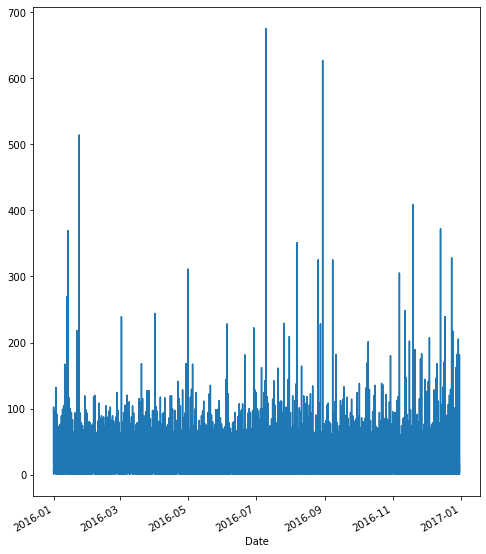

In [256]:
# Viz number of vistors by Date
temp1['number_of_visitors'].plot()

We can see that the viz is not that much clear as we used Date in X-axis

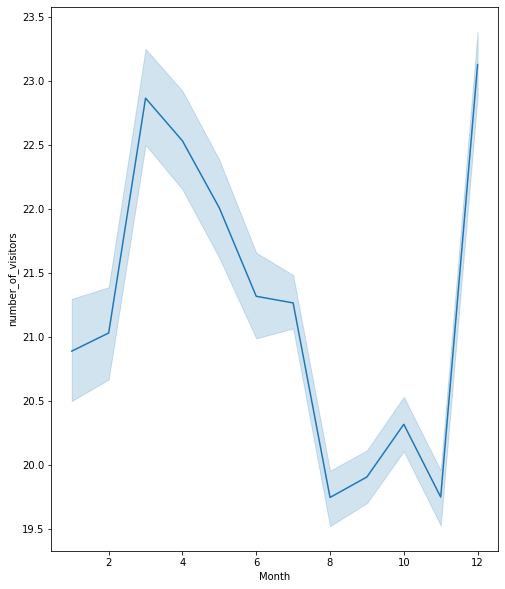

In [423]:
# Check data by month (average number of visits per store)
# Read dataset for viz without setting Date column as index
data3b = pd.read_csv("data2.csv", parse_dates=True)
temp1b = data3b.copy()
sns.lineplot(data = temp1b, x='Month', y='number_of_visitors')

So here, when we calculate the mean of store visits per store per day over a monthly period of 2016, the viz is way better

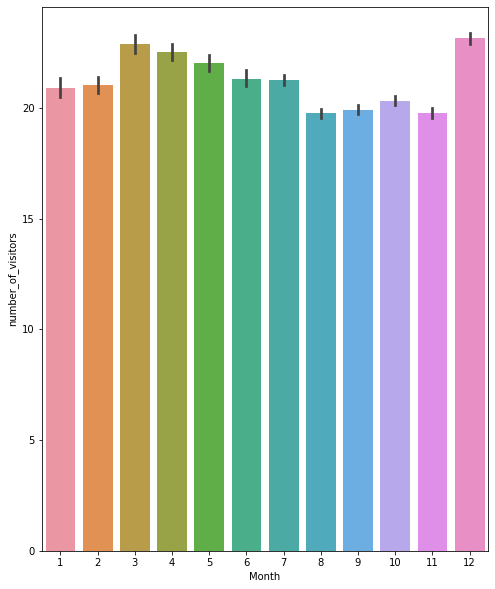

In [261]:
# Check data by month (daily average number of visits per store)
sns.barplot(data = temp1, x='Month', y='number_of_visitors')

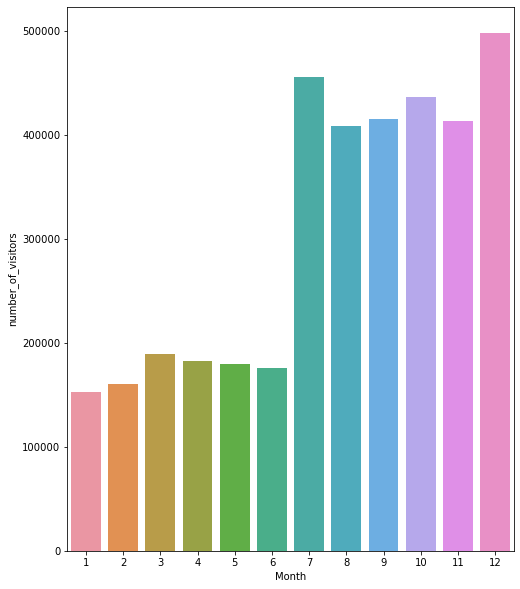

In [262]:
# Recheck data by month using groupby function. 
# But we conisder the total number of store visits in each month, not the mean per store per day
temp11 = temp1.groupby(['Month'])['number_of_visitors'].sum().reset_index()
sns.barplot(data = temp11, x='Month', y='number_of_visitors')

So why the mean visits for each store seem not change significantly through 2016 but the total number of store visits increased exponentially in the second half of 2016? We can consider take a look at the # store opened during the same period.

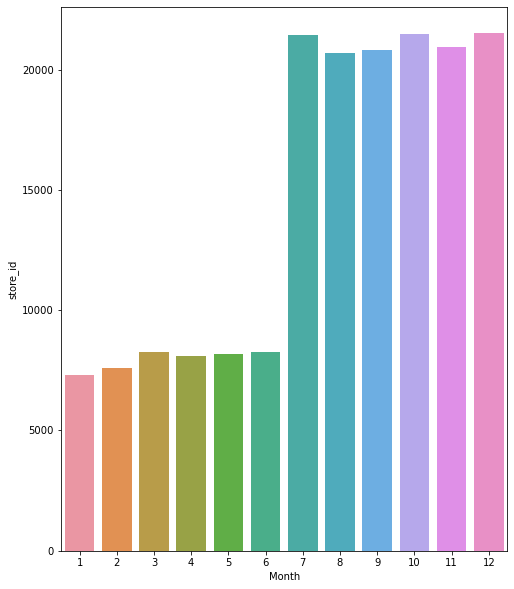

In [269]:
# Recheck # stores by month using groupby function
temp12 = temp1.groupby(['Month'])['store_id'].count().reset_index()
sns.barplot(data = temp12, x='Month', y='store_id')

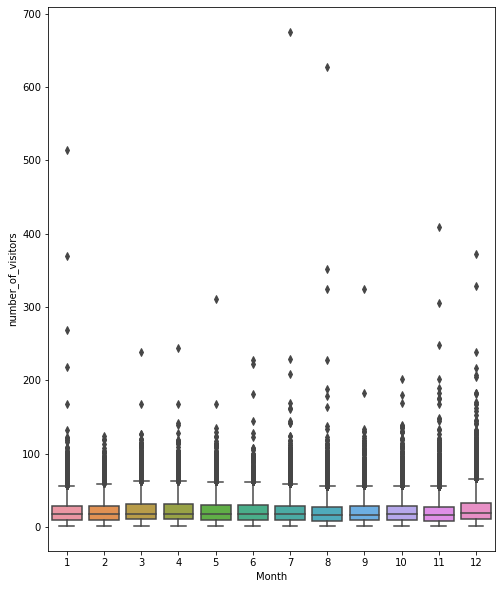

In [271]:
# Using boxplots to see more data patterns
# Mean store visits of each store over monthly period
sns.boxplot(data = temp1, x='Month', y='number_of_visitors')

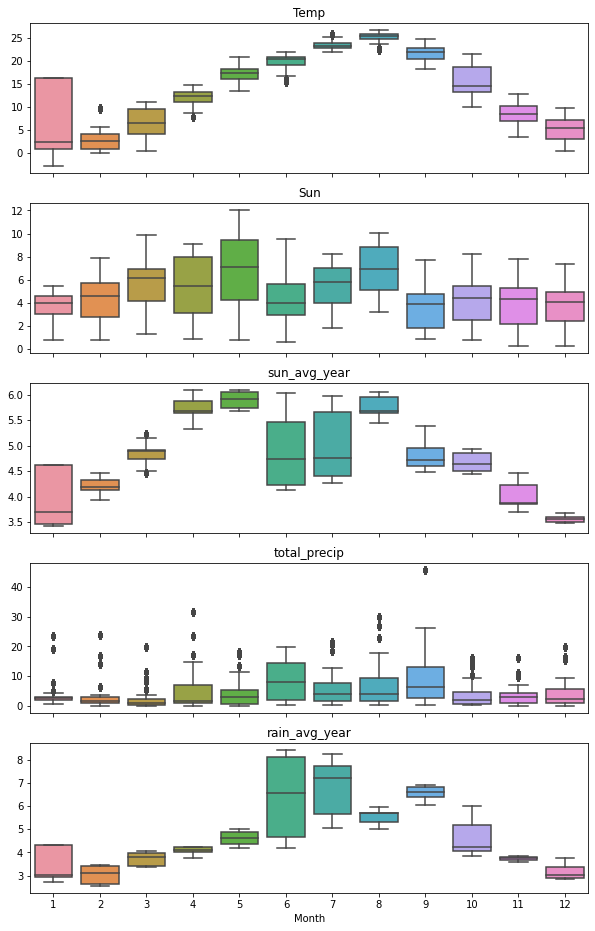

In [273]:
# Using boxplots to see more data patterns
# Other variables
import seaborn as sns
#start, end = '2016-01', '2016-12'
fig, axes = plt.subplots(5, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Temp', 'Sun', 'sun_avg_year','total_precip','rain_avg_year'], axes):
    sns.boxplot(data = temp1, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

In [274]:
# Resample data by month and week
temp1_month = temp1.resample("M").mean()
temp1_week = temp1.resample("W").mean()

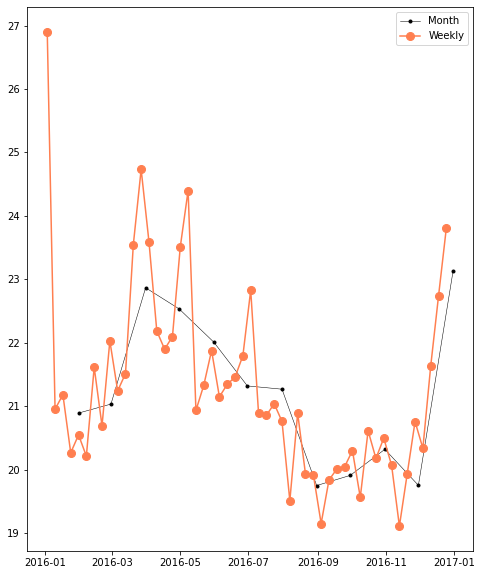

In [275]:
# Viz data by month and week
start, end = '2016-01', '2016-12'
fig, ax = plt.subplots()
ax.plot(temp1_month.loc[start:end, 'number_of_visitors'], marker='.', linestyle='-', linewidth = 0.5, label='Month', color='black')
ax.plot(temp1_week.loc[start:end, 'number_of_visitors'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
ax.legend()

### 5. Data transformation

In [326]:
# Read dataset 
data4 = pd.read_csv("data2c.csv", parse_dates=True)

# Create a copy to be used for cleaning
temp2=data4.copy()
temp2.head()

,Date,Month,type,Holiday_Name,Average of Temp,Average of total_precip,rain_avg_year,Average of Sun,sun_avg_year,number_of_visitors
0,1/1/2016,1,Bar/Cocktail,New Year's Day,16.38,2.86,4.31,4.57,4.63,15.11
1,1/1/2016,1,Cafe/Sweets,New Year's Day,16.38,2.86,4.31,4.57,4.63,26.60
2,1/1/2016,1,Creative cuisine,New Year's Day,16.38,2.86,4.31,4.57,4.63,7.00
3,1/1/2016,1,Dining bar,New Year's Day,16.38,2.86,4.31,4.57,4.63,15.14
4,1/1/2016,1,Italian/French,New Year's Day,16.38,2.86,4.31,4.57,4.63,5.75


In [327]:
# Drop the Date column which has no added value for the transformation and modeling part
columns = ['Date']
temp2.drop(columns, inplace=True, axis=1)
temp2.head()

,Month,type,Holiday_Name,Average of Temp,Average of total_precip,rain_avg_year,Average of Sun,sun_avg_year,number_of_visitors
0,1,Bar/Cocktail,New Year's Day,16.38,2.86,4.31,4.57,4.63,15.11
1,1,Cafe/Sweets,New Year's Day,16.38,2.86,4.31,4.57,4.63,26.60
2,1,Creative cuisine,New Year's Day,16.38,2.86,4.31,4.57,4.63,7.00
3,1,Dining bar,New Year's Day,16.38,2.86,4.31,4.57,4.63,15.14
4,1,Italian/French,New Year's Day,16.38,2.86,4.31,4.57,4.63,5.75


In [328]:
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    4620 non-null   int64  
 1   type                     4620 non-null   object 
 2   Holiday_Name             4620 non-null   object 
 3   Average of Temp          4620 non-null   float64
 4   Average of total_precip  4620 non-null   float64
 5   rain_avg_year            4620 non-null   float64
 6   Average of Sun           4620 non-null   float64
 7   sun_avg_year             4620 non-null   float64
 8   number_of_visitors       4620 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 325.0+ KB


In [329]:
# Convert string columns to factor/categorical types
temp2['type'] = temp2['type'].astype('category')
temp2['Holiday_Name'] = temp2['Holiday_Name'].astype('category')
temp2['Month'] = temp2['Month'].astype('category')

# check
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Month                    4620 non-null   category
 1   type                     4620 non-null   category
 2   Holiday_Name             4620 non-null   category
 3   Average of Temp          4620 non-null   float64 
 4   Average of total_precip  4620 non-null   float64 
 5   rain_avg_year            4620 non-null   float64 
 6   Average of Sun           4620 non-null   float64 
 7   sun_avg_year             4620 non-null   float64 
 8   number_of_visitors       4620 non-null   float64 
dtypes: category(3), float64(6)
memory usage: 232.1 KB


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

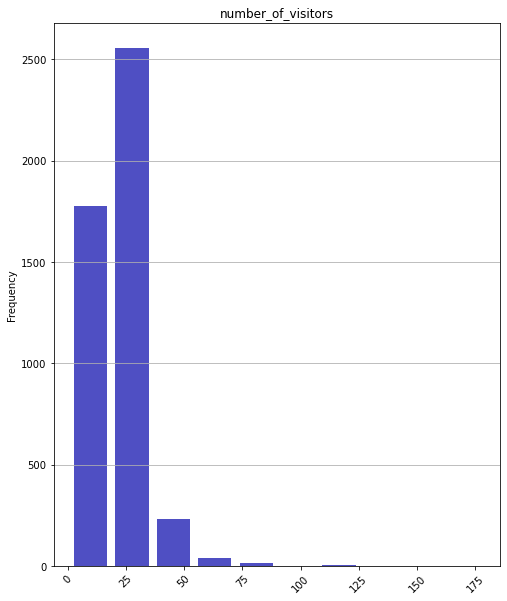

In [440]:
# Histogram of number_of_visitors - target variable
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=temp2["number_of_visitors"], color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.grid(axis='y', alpha=1)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('number_of_visitors')
plt.xticks(rotation=45)

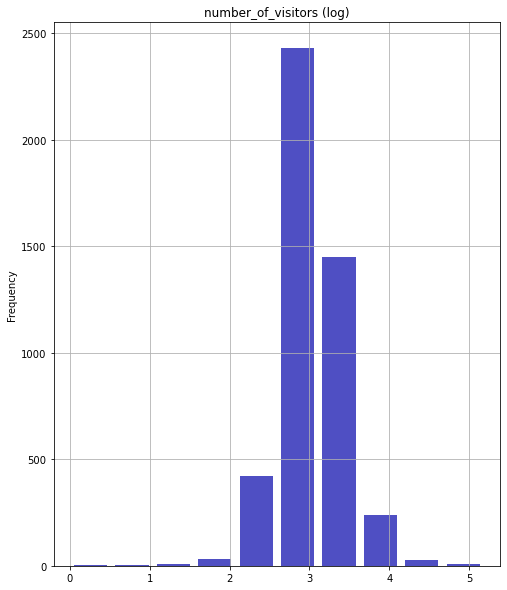

In [445]:
# Since the distribution of the target variable is not normal so we try using log transformation as below
temp2['number_of_visitors'].apply(np.log).hist(color='#0504aa',
                            alpha=0.7, rwidth=0.8)
plt.grid(axis='y', alpha=1)
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('number_of_visitors (log)')
plt.show()

In [446]:
# Examine the statistics of the target variable
temp2.iloc[:,8:9].describe()

,number_of_visitors
count,4620.000000
mean,22.283279
std,10.216691
min,1.000000
25%,16.817500
50%,20.360000
75%,25.360000
max,178.670000


In [447]:
# Examine the statistics of other features
temp2.iloc[:,0:8].describe()

,Month,Average of Temp,Average of total_precip,rain_avg_year,Average of Sun,sun_avg_year
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000
mean,6.862121,14.227738,5.346688,4.704472,4.825779,4.768104
std,3.414599,8.019893,6.380697,1.469630,2.373042,0.797801
min,1.000000,-2.810000,0.010000,2.550000,0.270000,3.420000
25%,4.000000,7.260000,1.240000,3.660000,3.210000,4.180000
50%,7.000000,15.030000,2.860000,4.240000,4.570000,4.660000
75%,10.000000,21.570000,7.160000,5.690000,6.420000,5.640000
max,12.000000,26.770000,45.740000,8.430000,12.050000,6.100000


This column can not be represented as a histogram
This column can not be represented as a histogram


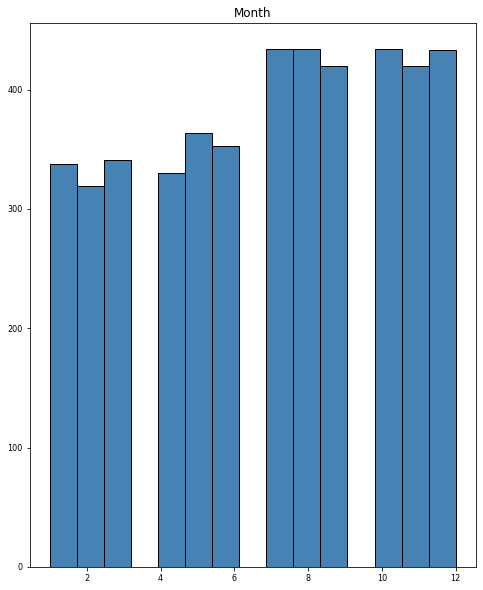

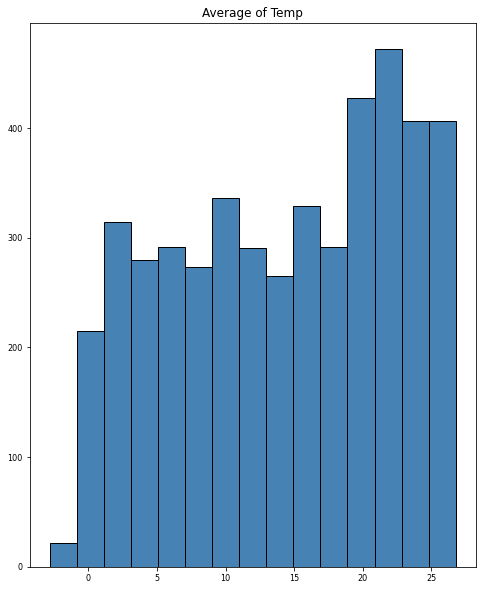

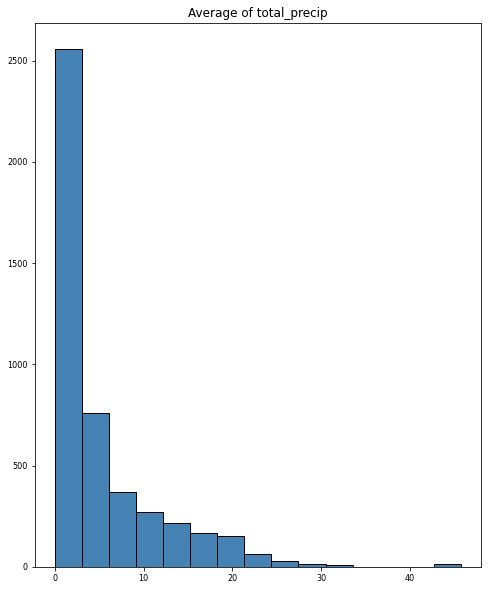

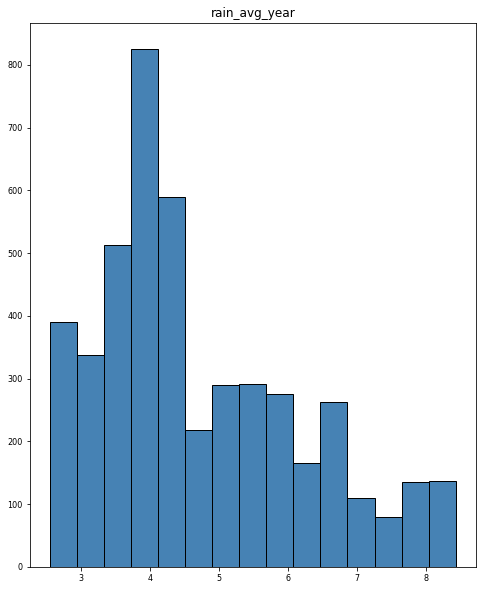

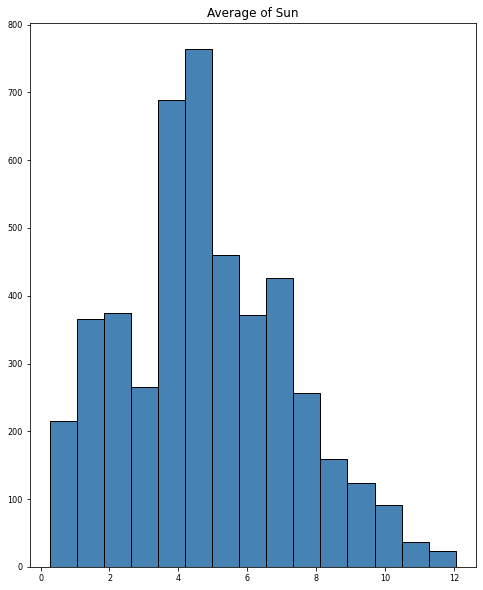

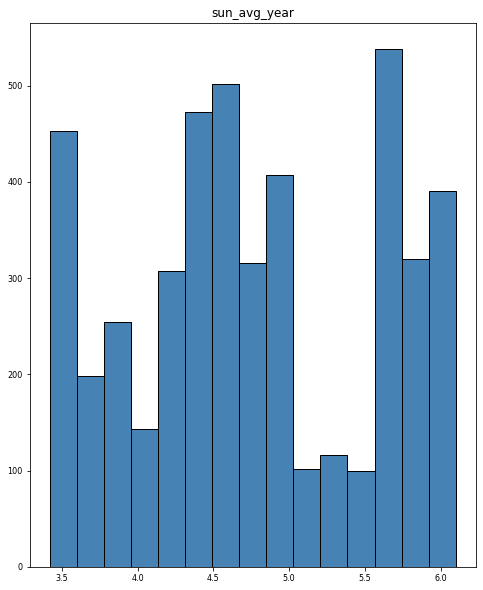

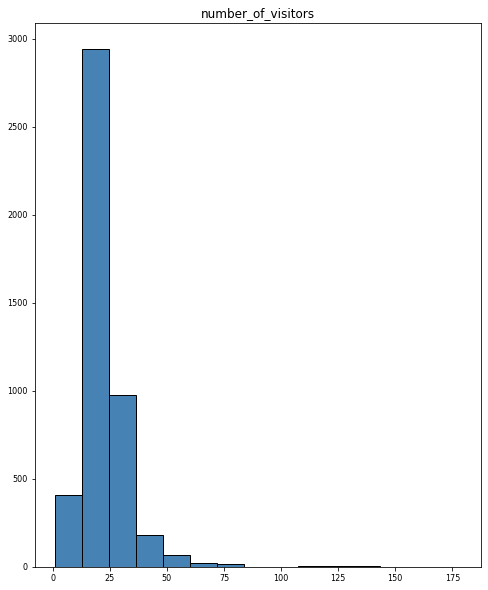

In [333]:
# Visualize the histograms of each numerical variables (ranking of activities, satisfaction and importance of each functions)

for col in temp2.columns: 
    try:      
        temp2[col] = pd.to_numeric(temp2[col]) 
        temp2.hist(column=col,bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)
    except ValueError:
        print('This column can not be represented as a histogram')

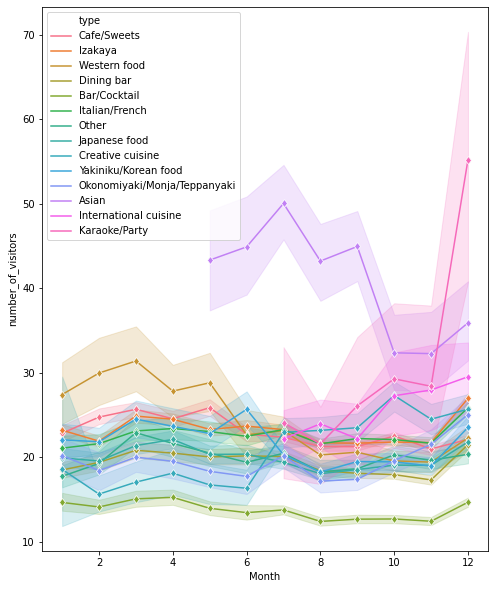

In [421]:
# 2D visualization
# We also want to look at the traffic trend of each store type over the year
sns.lineplot(x='Month',y='number_of_visitors', data=temp1, hue='type', marker='d')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


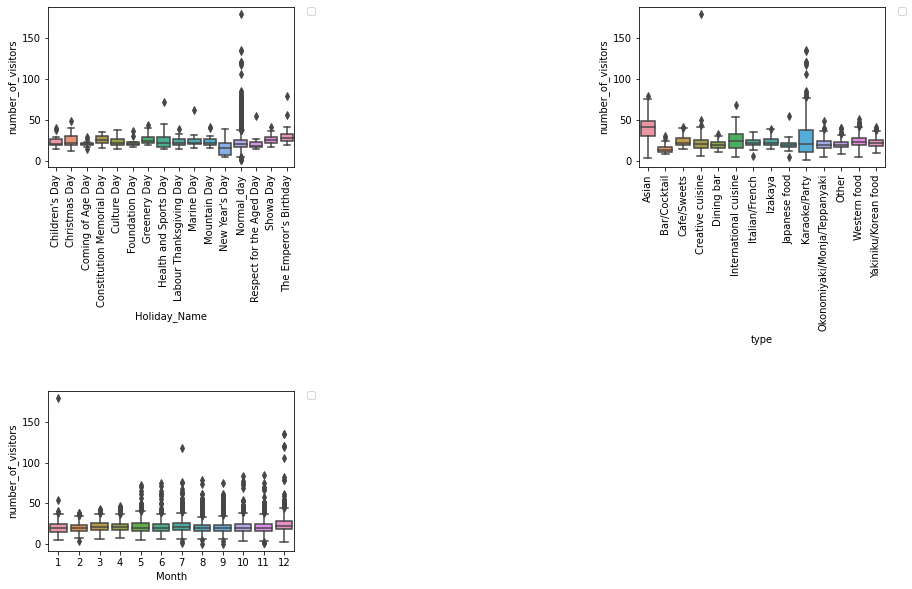

In [416]:
# 2D visualization
# Using boxplot to visualize the relationships between # store visits and 3 categorical variables:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=3, ncols=3)

v01 = fig.add_subplot(gs[0, 2])
v01 = sns.boxplot(data=temp2, y="number_of_visitors", x="type")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v02 = fig.add_subplot(gs[2, 0])
v02 = sns.boxplot(data=temp2, y="number_of_visitors", x="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v03 = fig.add_subplot(gs[0, 0])
v03 = sns.boxplot(data=temp2, y="number_of_visitors", x="Holiday_Name")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

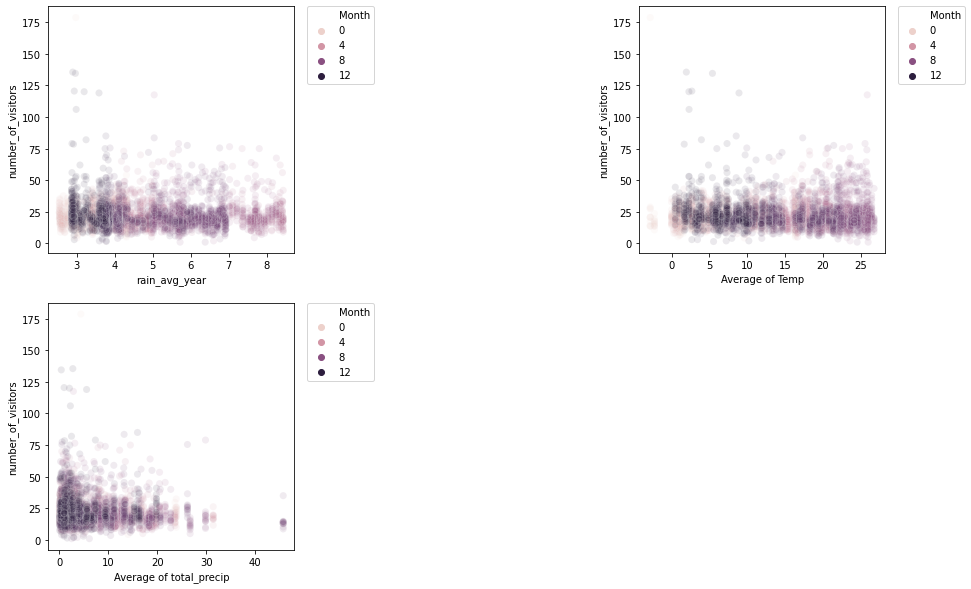

In [338]:
# 3D visualization
# Using scatter plots to visualize the relationships between # store visits and other numerical variables, 
# given the impacts from categorical variables

import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=3)

v1 = fig.add_subplot(gs[0, 2])
v1 = sns.scatterplot(data=temp2, y="number_of_visitors", x="Average of Temp", hue="Month", s=50, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v2 = fig.add_subplot(gs[1, 0])
v2 = sns.scatterplot(data=temp2, y="number_of_visitors", x="Average of total_precip", hue="Month",s=50, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v3 = fig.add_subplot(gs[0, 0])
v3 = sns.scatterplot(data=temp2, y="number_of_visitors", x="rain_avg_year", hue="Month",s=50, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

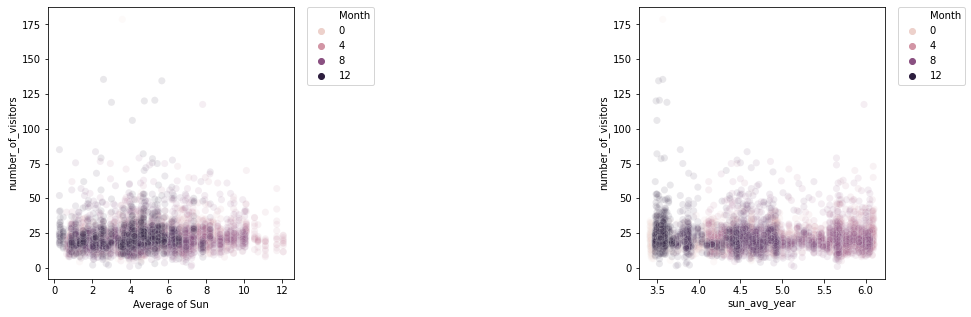

In [339]:
# 3D visualization
# Using scatter plots to visualize the relationships between # store visits and other numerical variables, 
# given the impacts from categorical variables

import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(nrows=1, ncols=3)

v4 = fig.add_subplot(gs[0, 0])
v4 = sns.scatterplot(data=temp2, y="number_of_visitors", x="Average of Sun", hue="Month", s=50, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

v5 = fig.add_subplot(gs[0, 2])
v5 = sns.scatterplot(data=temp2, y="number_of_visitors", x="sun_avg_year", hue="Month",s=50, alpha=0.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### 5. Convert to dummy variables and Correlation Matrix

In [340]:
# Create a copy to be used for dummy transformation and CM
temp3=temp2.copy()

# Check
temp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Month                    4620 non-null   int64   
 1   type                     4620 non-null   category
 2   Holiday_Name             4620 non-null   category
 3   Average of Temp          4620 non-null   float64 
 4   Average of total_precip  4620 non-null   float64 
 5   rain_avg_year            4620 non-null   float64 
 6   Average of Sun           4620 non-null   float64 
 7   sun_avg_year             4620 non-null   float64 
 8   number_of_visitors       4620 non-null   float64 
dtypes: category(2), float64(6), int64(1)
memory usage: 263.3 KB


In [341]:
# Convert categorical data to dummies for further analysis 
temp3=pd.get_dummies(temp3, columns=['type'])
temp3=pd.get_dummies(temp3, columns=['Month'])
temp3=pd.get_dummies(temp3, columns=['Holiday_Name'])

# Check
temp3.head()

,Average of Temp,Average of total_precip,rain_avg_year,Average of Sun,sun_avg_year,number_of_visitors,type_Asian,type_Bar/Cocktail,type_Cafe/Sweets,type_Creative cuisine,...,Holiday_Name_Greenery Day,Holiday_Name_Health and Sports Day,Holiday_Name_Labour Thanksgiving Day,Holiday_Name_Marine Day,Holiday_Name_Mountain Day,Holiday_Name_New Year's Day,Holiday_Name_Normal_day,Holiday_Name_Respect for the Aged Day,Holiday_Name_Showa Day,Holiday_Name_The Emperor's Birthday
0,16.38,2.86,4.31,4.57,4.63,15.11,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16.38,2.86,4.31,4.57,4.63,26.60,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16.38,2.86,4.31,4.57,4.63,7.00,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,16.38,2.86,4.31,4.57,4.63,15.14,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,16.38,2.86,4.31,4.57,4.63,5.75,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


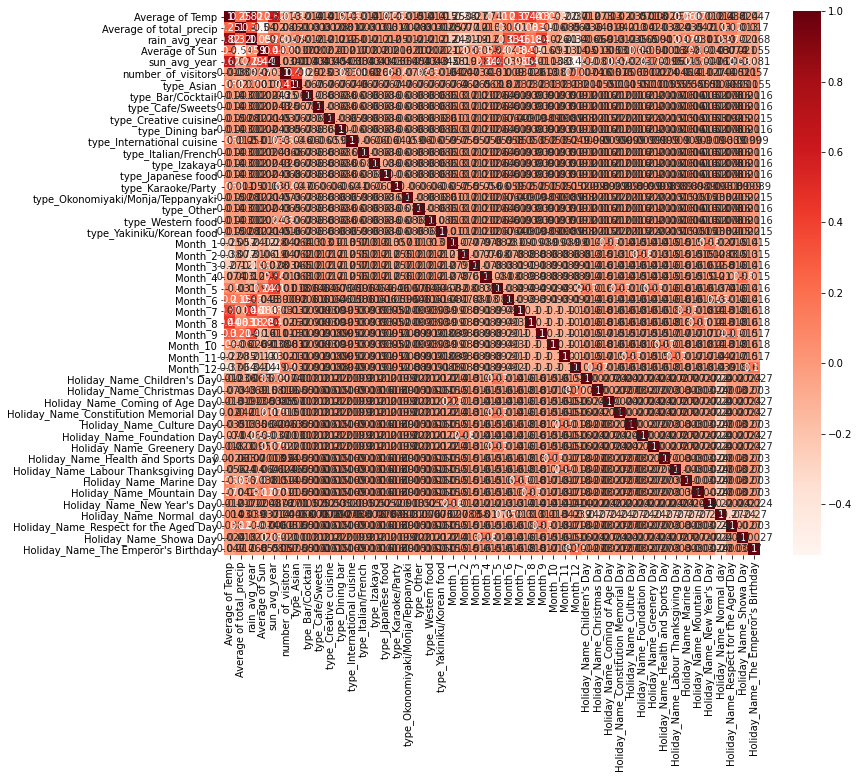

In [448]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = temp3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [342]:
# Review covariance between attribute (including all data points)
import matplotlib.pyplot as plt

corr_matrix=temp3.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

In [343]:
# Select correlations with target variable - number_of_visitors
outcome_cor = corr["number_of_visitors"]
outcome_cor.describe()
absoutcome_cor = outcome_cor.abs()
sortabscor = absoutcome_cor.sort_values(ascending=False)

# Top 13 features that are highest correlated with target variable - number_of_visitors
sortabscor.head(n=14)

number_of_visitors                   1.000000
type_Izakaya                         0.555909
type_Cafe/Sweets                     0.413279
type_Okonomiyaki/Monja/Teppanyaki    0.189721
type_Creative cuisine                0.180134
type_Western food                    0.168367
type_Asian                           0.163395
type_International cuisine           0.152501
type_Yakiniku/Korean food            0.149032
type_Karaoke/Party                   0.147074
type_Italian/French                  0.141236
type_Other                           0.137354
type_Dining bar                      0.128172
Month_12                             0.111888
Name: number_of_visitors, dtype: float64

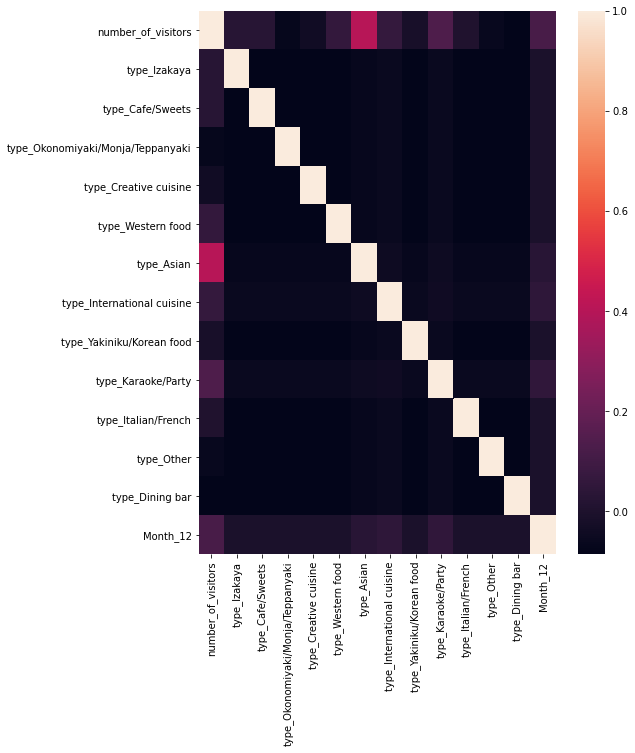

In [344]:
# Create another correlation matrix with top 10 features
import os
import seaborn as sn

# Selected columns of the dataset
top13_col = ['number_of_visitors','type_Izakaya', 'type_Cafe/Sweets', 'type_Okonomiyaki/Monja/Teppanyaki', 
             'type_Creative cuisine', 'type_Western food', 'type_Asian', 'type_International cuisine',
             'type_Yakiniku/Korean food', 'type_Karaoke/Party', 
             'type_Italian/French', 'type_Other', 'type_Dining bar', 'Month_12']
temp3top13 = temp3[top13_col]
corr_matrix2 = temp3top13.corr()
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix2)

### 6. Feature Selection and Modeling

In [345]:
# Total missing values for each feature
temp3.isnull().sum()

Average of Temp                           0
Average of total_precip                   0
rain_avg_year                             0
Average of Sun                            0
sun_avg_year                              0
number_of_visitors                        0
type_Asian                                0
type_Bar/Cocktail                         0
type_Cafe/Sweets                          0
type_Creative cuisine                     0
type_Dining bar                           0
type_International cuisine                0
type_Italian/French                       0
type_Izakaya                              0
type_Japanese food                        0
type_Karaoke/Party                        0
type_Okonomiyaki/Monja/Teppanyaki         0
type_Other                                0
type_Western food                         0
type_Yakiniku/Korean food                 0
Month_1                                   0
Month_2                                   0
Month_3                         

In [346]:
np.isnan(temp3)
np.where(np.isnan(temp3))

(array([], dtype=int64), array([], dtype=int64))

#### 6.1. Filter Method: Feature Selection based on top 13 highest correlated independent variables

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

In [450]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [511]:
# Separate feature variables and target variable
feature_cols1 = ['type_Izakaya', 'type_Cafe/Sweets', 'type_Okonomiyaki/Monja/Teppanyaki', 
             'type_Creative cuisine', 'type_Western food', 'type_Asian', 'type_International cuisine',
             'type_Yakiniku/Korean food', 'type_Karaoke/Party', 
             'type_Italian/French', 'type_Other', 'type_Dining bar', 'Month_12']
X1 = temp3[['type_Izakaya', 'type_Cafe/Sweets', 'type_Okonomiyaki/Monja/Teppanyaki', 
             'type_Creative cuisine', 'type_Western food', 'type_Asian', 'type_International cuisine',
             'type_Yakiniku/Korean food', 'type_Karaoke/Party', 
             'type_Italian/French', 'type_Other', 'type_Dining bar', 'Month_12']]
y1 = temp3['number_of_visitors']
# summarize the dataset
print(X1.shape, y1.shape)

(4620, 13) (4620,)


In [512]:
# train-test split method

# Split into training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [513]:
# Fit the model
lm1 = LinearRegression()
lm1.fit(X_train1, np.log(y_train1))
lm1.score(X_train1, np.log(y_train1))

0.2156589663674543

In [514]:
# Print y-intercept
print(lm1.intercept_)
# Print the beta coef
print(lm1.coef_)

2.7818212879083797
[0.33259034 0.31918339 0.13732026 0.16638358 0.36357433 0.81288026
 0.29857977 0.25401218 0.09116907 0.29239561 0.17111586 0.14489325
 0.13528392]


In [515]:
# Making predictions
y_pred1 = (lm1.predict(X_test1))
y_pred1

array([2.78182129, 3.17111738, 3.07421689, ..., 3.03583346, 2.95293715,
       2.87299036])

In [516]:
# Model Evaluation
from sklearn import metrics

# Print result of MAE
print(metrics.mean_absolute_error(np.log(y_test1), (y_pred1)))

# Print result of MSE
print(metrics.mean_squared_error(np.log(y_test1), (y_pred1)))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(np.log(y_test1), (y_pred1))))

0.25719778903575413
0.12216487904994613
0.3495209279141181


#### 6.2. Feature Selection with sklearn and Pandas: Wrapper Method
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

In [449]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#### Backward Elimination

In [517]:
# Backward Elimination

# Set X and y
X2a = temp3.drop("number_of_visitors",1)   #Feature Matrix
y2a = temp3["number_of_visitors"]          #Target Variable

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X2a)
#Fitting sm.OLS model
model2a = sm.OLS(y2a,X_1).fit()
model2a.pvalues

const                                      6.411197e-13
Average of Temp                            2.571112e-01
Average of total_precip                    1.792145e-03
rain_avg_year                              5.906833e-01
Average of Sun                             1.884826e-04
sun_avg_year                               1.497346e-01
type_Asian                                2.374444e-205
type_Bar/Cocktail                          1.594426e-54
type_Cafe/Sweets                           1.277600e-03
type_Creative cuisine                      2.602400e-01
type_Dining bar                            7.394796e-06
type_International cuisine                 1.448750e-11
type_Italian/French                        4.843596e-02
type_Izakaya                               8.864000e-04
type_Japanese food                         9.816741e-04
type_Karaoke/Party                         4.242304e-34
type_Okonomiyaki/Monja/Teppanyaki          2.406845e-04
type_Other                                 2.394

In [518]:
#Backward Elimination
cols2a = list(X2a.columns)
pmax = 1
while (len(cols2a)>0):
    p= []
    X_1 = X2a[cols2a]
    X_1 = sm.add_constant(X_1)
    model2a = sm.OLS(y2a,X_1).fit()
    p = pd.Series(model2a.pvalues.values[1:],index = cols2a)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols2a.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols2a
print(selected_features_BE)

['Average of total_precip', 'Average of Sun', 'type_Asian', 'type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Dining bar', 'type_International cuisine', 'type_Italian/French', 'type_Izakaya', 'type_Japanese food', 'type_Karaoke/Party', 'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_9', 'Month_12', 'Holiday_Name_Constitution Memorial Day', 'Holiday_Name_Greenery Day', 'Holiday_Name_Health and Sports Day', "Holiday_Name_The Emperor's Birthday"]


In [519]:
# Separate feature variables and target variable
feature_cols21 = ['Average of total_precip', 'Average of Sun', 'type_Asian', 'type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Dining bar', 'type_International cuisine', 'type_Italian/French', 'type_Izakaya', 'type_Japanese food', 'type_Karaoke/Party', 'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_9', 'Month_12', 'Holiday_Name_Constitution Memorial Day', 'Holiday_Name_Greenery Day', 'Holiday_Name_Health and Sports Day', "Holiday_Name_The Emperor's Birthday"]
X21 = temp3[['Average of total_precip', 'Average of Sun', 'type_Asian', 'type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Dining bar', 'type_International cuisine', 'type_Italian/French', 'type_Izakaya', 'type_Japanese food', 'type_Karaoke/Party', 'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_9', 'Month_12', 'Holiday_Name_Constitution Memorial Day', 'Holiday_Name_Greenery Day', 'Holiday_Name_Health and Sports Day', "Holiday_Name_The Emperor's Birthday"]]
y21 = temp3['number_of_visitors']

# summarize the dataset
print(X21.shape, y21.shape)

(4620, 27) (4620,)


In [520]:
# train-test split method

# Split into training and testing
X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, test_size=0.3)

# Fit the model
lm21 = LinearRegression()
lm21.fit(X_train21, np.log(y_train21))
lm21.score(X_train21, np.log(y_train21))

0.2826141021399394

In [521]:
# Print y-intercept
print(lm21.intercept_)
# Print the beta coef
print(lm21.coef_)

2.9351307349632303
[-0.00499943  0.00955821  0.61382262 -0.4362266   0.09456222 -0.07479783
  0.13287257  0.09093986  0.11163356 -0.03539029 -0.00613951 -0.09078434
 -0.03295942  0.13804984  0.04926133  0.03514524  0.11639918  0.09937481
  0.03331273  0.06712389  0.05570886  0.05516355  0.15727322  0.25221807
  0.28529812  0.18365232  0.29908836]


In [522]:
# Making predictions
y_pred21 = (lm21.predict(X_test21))
y_pred21

array([3.05907901, 2.98100386, 3.0415114 , ..., 2.9541932 , 2.98259141,
       3.08779231])

In [523]:
# Model Evaluation
from sklearn import metrics

# Print result of MAE
print(metrics.mean_absolute_error(np.log(y_test21), (y_pred21)))

# Print result of MSE
print(metrics.mean_squared_error(np.log(y_test21), (y_pred21)))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(np.log(y_test21), (y_pred21))))

0.2383622392913331
0.1179616814952667
0.34345550147765386


#### RFE (Recursive Feature Elimination)

In [371]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [524]:
# Set X and y
X2b = temp3.drop("number_of_visitors",1)   #Feature Matrix
y2b = temp3["number_of_visitors"]          #Target Variable

In [525]:
model2b = LinearRegression()
#Initializing RFE model
rfe = RFE(model2b, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2b,y2b)  
#Fitting the data to model
model2b.fit(X_rfe,y2b)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False  True False  True  True False False
 False  True False  True  True False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[41 39 40 37 38  8  1  3  1  1  6  2  4  1  7  1  1  5  1 16 13 19 18 17
 14 15  9 11 12 10 20 30 22 25 32 29 26 35 33 28 27 31 21 24 23 34 36]


In [526]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(X2b,y2b, test_size = 0.3, random_state = 0)
    model2b = LinearRegression()
    rfe = RFE(model2b,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train2b,y_train2b)
    X_test_rfe = rfe.transform(X_test2b)
    model2b.fit(X_train_rfe,y_train2b)
    score = model2b.score(X_test_rfe,y_test2b)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.216682


In [527]:
cols2b = list(X2b.columns)
model2b = LinearRegression()
#Initializing RFE model
rfe = RFE(model2b, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2b,y2b)  
#Fitting the data to model
model2b.fit(X_rfe,y2b)              
temp = pd.Series(rfe.support_,index = cols2b)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Creative cuisine',
       'type_Dining bar', 'type_International cuisine', 'type_Italian/French',
       'type_Izakaya', 'type_Japanese food',
       'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food',
       'type_Yakiniku/Korean food'],
      dtype='object')


In [528]:
# Separate feature variables and target variable
feature_cols22 = ['type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Creative cuisine',
       'type_Dining bar', 'type_International cuisine', 'type_Italian/French',
       'type_Izakaya', 'type_Japanese food',
       'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food',
       'type_Yakiniku/Korean food']
X22 = temp3[['type_Bar/Cocktail', 'type_Cafe/Sweets', 'type_Creative cuisine',
       'type_Dining bar', 'type_International cuisine', 'type_Italian/French',
       'type_Izakaya', 'type_Japanese food',
       'type_Okonomiyaki/Monja/Teppanyaki', 'type_Other', 'type_Western food',
       'type_Yakiniku/Korean food']]
y22 = temp3['number_of_visitors']

# summarize the dataset
print(X22.shape, y22.shape)

(4620, 12) (4620,)


In [529]:
# train-test split method

# Split into training and testing
X_train22, X_test22, y_train22, y_test22 = train_test_split(X22, y22, test_size=0.3)

# Fit the model
lm22 = LinearRegression()
lm22.fit(X_train22, np.log(y_train22))
lm22.score(X_train22, np.log(y_train22))

0.1869795634258622

In [530]:
# Print y-intercept
print(lm22.intercept_)
# Print the beta coef
print(lm22.coef_)

3.335582679685902
[-0.74297003 -0.22803938 -0.3690103  -0.39029953 -0.1978977  -0.23476479
 -0.21827143 -0.37195588 -0.40447753 -0.37712096 -0.19701991 -0.28337033]


In [531]:
# Making predictions
y_pred22 = (lm22.predict(X_test22))
y_pred22

array([3.13768498, 3.33558268, 2.59261265, ..., 2.9636268 , 3.13856277,
       2.94528315])

In [532]:
# Model Evaluation
from sklearn import metrics

# Print result of MAE
print(metrics.mean_absolute_error(np.log(y_test22), (y_pred22)))

# Print result of MSE
print(metrics.mean_squared_error(np.log(y_test22), (y_pred22)))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(np.log(y_test22), (y_pred22))))

0.2509307472009291
0.1263953354590881
0.3555212166089221


#### 6.3. Feature Selection with sklearn and Pandas: Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [533]:
# Set X and y
X3 = temp3.drop("number_of_visitors",1)   #Feature Matrix
y3 = temp3["number_of_visitors"]          #Target Variable

In [534]:
reg3 = LassoCV()
reg3.fit(X3, y3)
print("Best alpha using built-in LassoCV: %f" % reg3.alpha_)
print("Best score using built-in LassoCV: %f" %reg3.score(X3, y3))
coef = pd.Series(reg3.coef_, index = X3.columns)

Best alpha using built-in LassoCV: 0.014881
Best score using built-in LassoCV: 0.288442


In [535]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 30 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

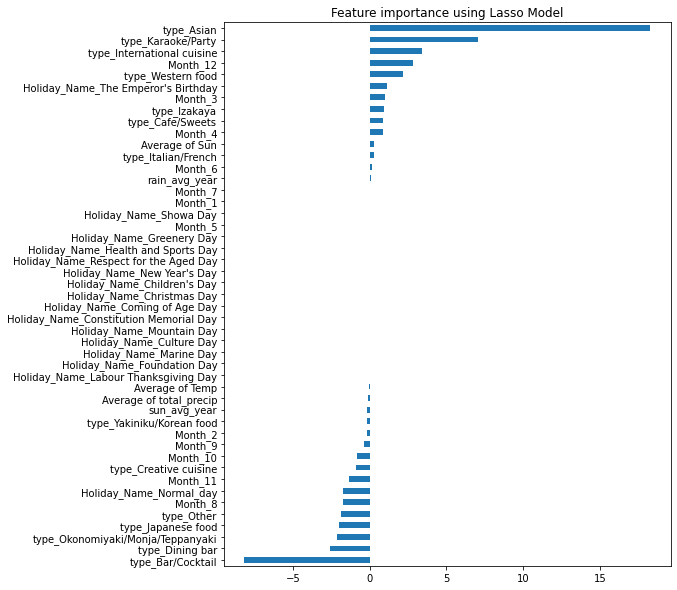

In [536]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [537]:
# Separate feature variables and target variable
feature_cols3 = ['type_Asian','type_Karaoke/Party','type_International cuisine','Month_12','type_Western food',"Holiday_Name_The Emperor's Birthday",'Month_3',
                 'type_Izakaya','type_Cafe/Sweets','Month_4','Average of Sun','type_Italian/French','Month_6','rain_avg_year',
                'Average of Temp','Average of total_precip','sun_avg_year','type_Yakiniku/Korean food','Month_2','Month_9',
                'Month_10','type_Creative cuisine','Month_11','Month_8','Holiday_Name_Normal_day','type_Other','type_Japanese food',
                'type_Okonomiyaki/Monja/Teppanyaki','type_Dining bar','type_Bar/Cocktail']
X33 = temp3[['type_Asian','type_Karaoke/Party','type_International cuisine','Month_12','type_Western food',"Holiday_Name_The Emperor's Birthday",'Month_3',
                 'type_Izakaya','type_Cafe/Sweets','Month_4','Average of Sun','type_Italian/French','Month_6','rain_avg_year',
                'Average of Temp','Average of total_precip','sun_avg_year','type_Yakiniku/Korean food','Month_2','Month_9',
                'Month_10','type_Creative cuisine','Month_11','Month_8','Holiday_Name_Normal_day','type_Other','type_Japanese food',
                'type_Okonomiyaki/Monja/Teppanyaki','type_Dining bar','type_Bar/Cocktail']]
y33 = temp3['number_of_visitors']

# summarize the dataset
print(X33.shape, y33.shape)

(4620, 30) (4620,)


In [538]:
# train-test split method

# Split into training and testing
X_train33, X_test33, y_train33, y_test33 = train_test_split(X33, y33, test_size=0.3)

# Fit the model
lm33 = LinearRegression()
lm33.fit(X_train33, np.log(y_train33))
lm33.score(X_train33, np.log(y_train33))

0.279191147244356

In [539]:
# Print y-intercept
print(lm33.intercept_)
# Print the beta coef
print(lm33.coef_)

3.0180829783907046
[ 5.64207539e-01 -1.75431133e-03  7.58404200e-02  1.45127761e-01
  1.15628061e-01  2.93896304e-01  9.85469133e-02  7.59194031e-02
  6.30060276e-02  6.31770240e-02  1.07034665e-02  5.33058213e-02
  9.27049811e-03  6.52525869e-03  3.91888993e-04 -4.97995656e-03
  1.86775427e-03 -1.14874937e-02  1.41410865e-02 -1.59062778e-02
 -2.23538470e-02 -9.36613536e-02 -1.41756336e-03 -7.00416921e-02
 -6.54917769e-02 -7.83946075e-02 -7.26402891e-02 -1.13922095e-01
 -1.09643464e-01 -4.66403658e-01]


In [540]:
# Making predictions
y_pred33 = (lm33.predict(X_test33))
y_pred33

array([3.09513332, 2.92405976, 3.08541832, ..., 2.97764152, 3.309689  ,
       3.03983686])

In [541]:
# Model Evaluation
from sklearn import metrics

# Print result of MAE
print(metrics.mean_absolute_error(np.log(y_test33), (y_pred33)))

# Print result of MSE
print(metrics.mean_squared_error(np.log(y_test33), (y_pred33)))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(np.log(y_test33), (y_pred33))))

0.24296487209289722
0.12109412530975708
0.3479858119374367


#### 6.4***. Other feature selection approach

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
# load the data
X = temp3[predictors].values
y = temp3[target_column].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [112]:
# Step 1 - Loading the Required Libraries and Modules
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [113]:
# Step 2 - Reading the Data and Performing Basic Data Checks
# Step 3 - Creating Arrays for the Features and the Response Variable
target_column = ['number_of_visitors'] 
predictors = list(set(list(temp3.columns))-set(target_column))
temp3[predictors] = temp3[predictors]/temp3[predictors].max()
temp3.describe()

,Average of Temp,Average of total_precip,rain_avg_year,Average of Sun,sun_avg_year,number_of_visitors,type_Asian,type_Bar/Cocktail,type_Cafe/Sweets,type_Creative cuisine,...,Holiday_Name_Greenery Day,Holiday_Name_Health and Sports Day,Holiday_Name_Labour Thanksgiving Day,Holiday_Name_Marine Day,Holiday_Name_Mountain Day,Holiday_Name_New Year's Day,Holiday_Name_Normal_day,Holiday_Name_Respect for the Aged Day,Holiday_Name_Showa Day,Holiday_Name_The Emperor's Birthday
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,...,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000
mean,0.531481,0.116893,0.558063,0.400480,0.781656,793.424242,0.049784,0.079221,0.079221,0.079004,...,0.002381,0.003030,0.003030,0.003030,0.003030,0.001948,0.959524,0.003030,0.002381,0.003030
std,0.299585,0.139499,0.174333,0.196933,0.130787,1022.749336,0.217521,0.270112,0.270112,0.269775,...,0.048742,0.054971,0.054971,0.054971,0.054971,0.044099,0.197095,0.054971,0.048742,0.054971
min,-0.104968,0.000219,0.302491,0.022407,0.560656,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.271199,0.027110,0.434164,0.266390,0.685246,129.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.561449,0.062527,0.502966,0.379253,0.763934,367.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.805753,0.156537,0.674970,0.532780,0.924590,1054.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,6878.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Step 4 - Creating the Training and Test Datasets
X = temp3[predictors].values
y = temp3[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3234, 47)
(1386, 47)


In [115]:
# Step 5 - Build, Predict and Evaluate the Regression Model

In [116]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
# RMSE and R2 for training and testing
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

467.7806880357296
0.792027575351356
449.5410391011612
0.803903442465406


In [123]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

# RMSE and R2 for training and testing
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

467.779684331932
0.7920284678315024
449.5457977604065
0.8038992908460683


In [130]:
# Lasso Regression
model_lasso = Lasso(alpha=0.01,tol=0.01)
model_lasso.fit(X_train, y_train) 

# RMSE and R2 for training and testing
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

467.7804391904047
0.7920277966215072
449.52921876496686
0.8039137547464257


In [120]:
# ElasticNet Regression
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 

# RMSE and R2 for training and testing
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

473.600283335486
0.7868206736574215
453.7515816861753
0.8002128354238967
